# Chrominance subsampling

In [25]:
# pip install PyWavelets
import pywt

In [26]:
def subsample_chroma(image, levels):
    subsampled = np.ndarray((image.shape[0], image.shape[1], 3), 'uint8')
    
    # Luma
    subsampled[:,:,0] = image[:,:,0] # Copy only first component

    # Chroma U
    DWT_coeffs = pywt.wavedec2(image[:,:,1], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # "Delete" LH subbands
        DWT_coeffs[i+1][1][:,:] = 0.0 # "Delete" HL subbands
        DWT_coeffs[i+1][2][:,:] = 0.0 # "Delete" HH subbands

    subsampled[:,:,1] = pywt.waverec2(DWT_coeffs, 'bior3.5')
                  
    # Chroma V
    DWT_coeffs = pywt.wavedec2(image[:,:,2], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # "Delete" LH subbands
        DWT_coeffs[i+1][1][:,:] = 0.0 # "Delete" HL subbands
        DWT_coeffs[i+1][2][:,:] = 0.0 # "Delete" HH subbands
    subsampled[:,:,2] = pywt.waverec2(DWT_coeffs, 'bior3.5')

    return (subsampled, (subsampled.shape[0], subsampled.shape[1]), DWT_coeffs[0].shape)

In [27]:
chroma_subsampled_YUV, luma_shape, chroma_shape = subsample_chroma(YUV, 5)
print("Luma shape =", luma_shape, "pixels\nChroma shape =", chroma_shape, "coefficients")

Luma shape = (1024, 512) pixels
Chroma shape = (42, 26) coefficients


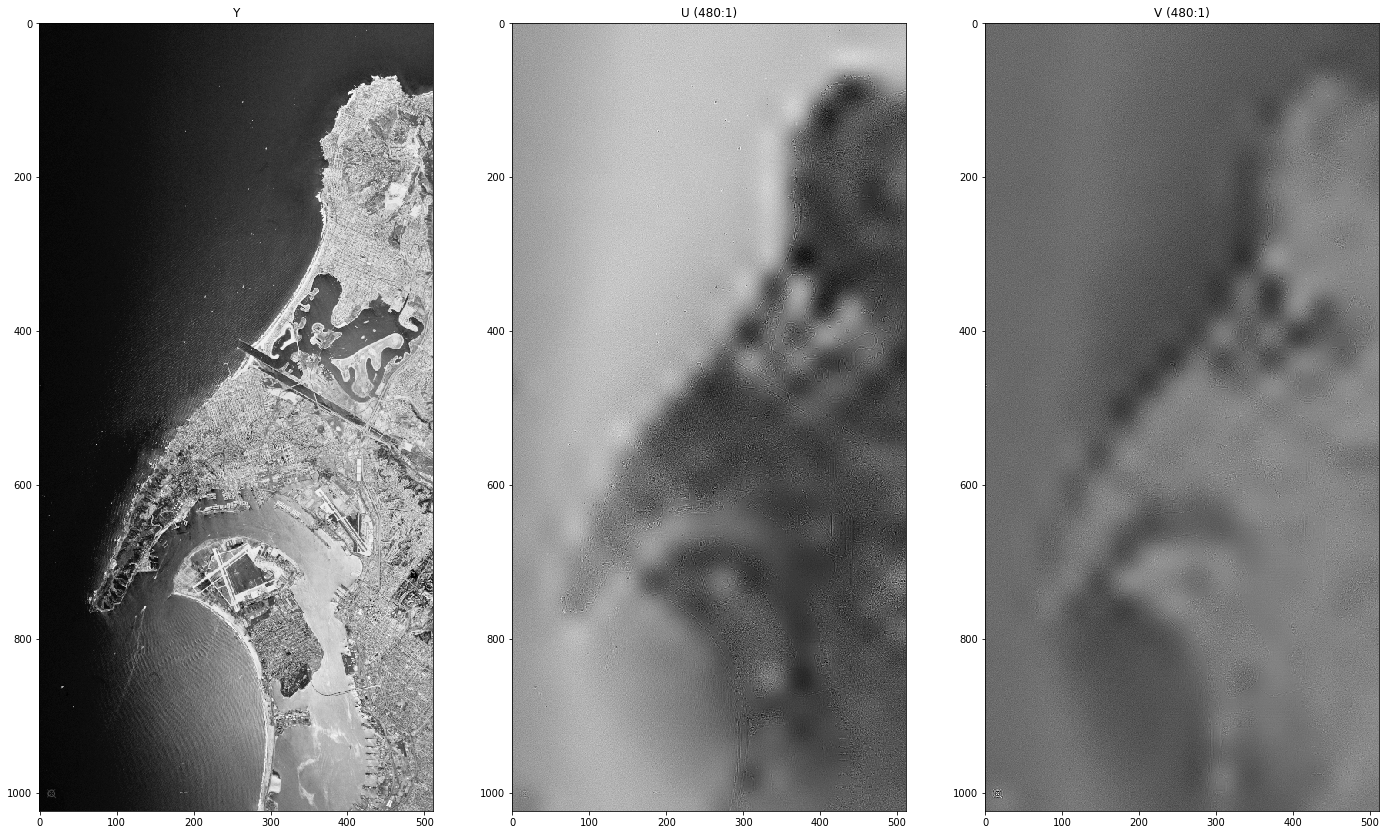

In [28]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
a.set_title("Y")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,0], cmap='gray')

a = fig.add_subplot(1,3,2)
a.set_title("U (480:1)")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray')

a = fig.add_subplot(1,3,3)
a.set_title("V (480:1)")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,2], cmap='gray')

plt.show()
#plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray' # Shows U
#plt.show()

In [29]:
chroma_subsampled_RGB = cv2.cvtColor(chroma_subsampled_YUV, cv2.COLOR_YUV2RGB)

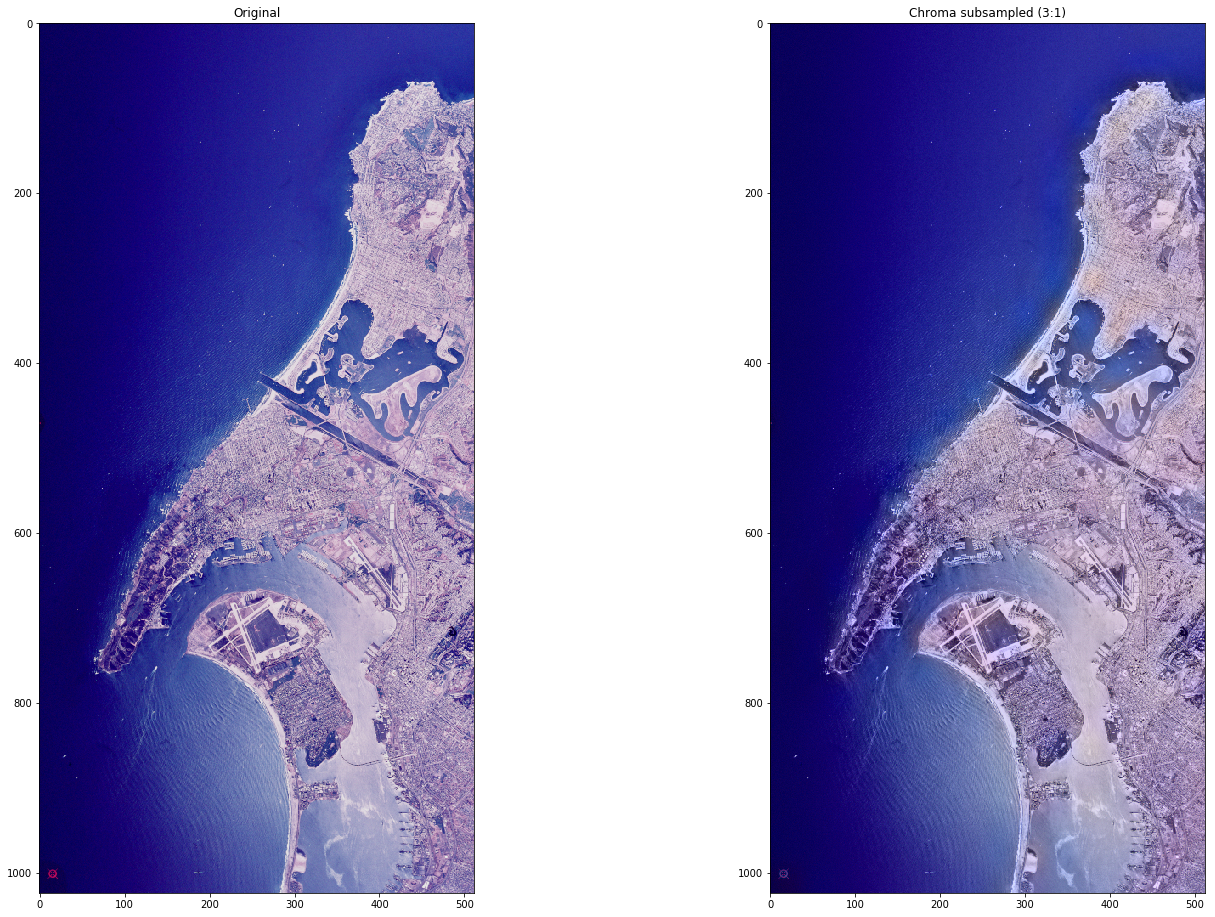

In [30]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,2,1) # Rows, cols, subfigure
a.set_title("Original")
plt.imshow(RGB)

a = fig.add_subplot(1,2,2) # Rows, cols, subfigure
a.set_title("Chroma subsampled (3:1)")
plt.imshow(chroma_subsampled_RGB)

plt.show()

In [31]:
print("The original image uses ", \
      luma_shape[0]*luma_shape[1] * 3,
      "bytes"
     )
print("The subsampled image uses", \
      luma_shape[0]*luma_shape[1] +
      chroma_shape[0]*chroma_shape[1] * 2,
      "bytes"
     )

The original image uses  1572864 bytes
The subsampled image uses 526472 bytes
